In [9]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

In [10]:
def plot_data(b,m,x,y):
    plt.scatter(x,y,label='data')
    plt.plot(x,m*x+b,color='red')
    
    #details to show 
    plt.xlabel = 'X'
    plt.ylabel = 'Y'
    plt.title = 'linear regression demo'
    
    plt.legend(['regression line','data points'])
    
    plt.show()

In [11]:
def compute_error(b,m,data):
    totalError = 0.0
    for i in range(len(data)):
        x = data['x'][i]
        y = data['y'][i]
        totalError += ( y - (m*x + b)) ** 2
        
    return float(totalError)/(len(data))

In [12]:
def step_gradient(b,m,data,learning_rate):
    b_gradient = 0
    m_gradient = 0
    
    N = float(len(data))
    
    for i in range(len(data)):
        x = data['x'][i]
        y = data['y'][i]
        
        b_gradient += -(2/N) * (y - (m*x + b))
        m_gradient += -(2*x/N) * (y - (m*x + b))
        
    b = b - (learning_rate * b_gradient)
    m = m - (learning_rate * m_gradient)
    
    return b,m

In [13]:
def gradient_descent_runner(data,initial_b,initial_m,learning_rate,no_of_iterations):
    b = initial_b
    m = initial_m
    
    for i in range(no_of_iterations):
        b,m = step_gradient(b,m,data,learning_rate)
        
    return b,m

In [14]:
def main():
    
    #getting data
    #data = pd.read_table('data_set.txt',sep=',',header=None)
    data = pd.read_table('data.csv',sep=',',header=None)
    data.columns = ['x','y']
    
    #defining hyper params
    #how fast the model converges
    learning_rate = 0.00001

    # for Y = mx + b
    initial_b = 0
    initial_m = 0
    
    no_of_iterations = 1000
    
    b,m = gradient_descent_runner(data,initial_b,initial_m,learning_rate,no_of_iterations)
    
    #ploting data
    plot_data(b,m,data['x'],data['y'])
    

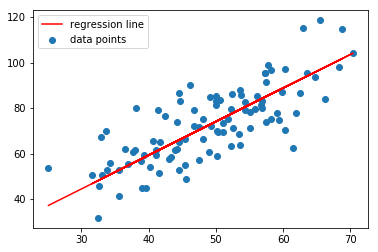

In [15]:
if __name__ == '__main__':
    main()